In [10]:
pid = 38178

In [107]:
from __future__ import division
from glob import glob
from collections import defaultdict
import itertools as it
from math import sqrt

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from numpy.polynomial import polynomial as poly

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc, cm, gridspec

In [4]:
import tracks
reload(tracks)
import otracks
reload(otracks)

<module 'otracks' from 'otracks.pyc'>

In [5]:
import orientation as orient
reload(orient)
import correlation as corr
reload(corr)

<module 'correlation' from 'correlation.pyc'>

In [71]:
import helpy
reload(helpy)
from helpy import R, Nb, N, S_vid as S, A_vid as A

In [7]:
rc('font', family='serif', serif=['Latin Modern', 'Computer Modern'])
rc('text', usetex=True)
smallfig = (5,4)
largefig = (8,6)

In [11]:
# Time
fps = 120 #150
freq = 50 #Shaker freq 50 Hz
#nframes = 3000
dt0 = dtau = 10

In [9]:
locdir = '/Users/leewalsh/Physics/Squares/diffusion/orientational/'
savedir = '/Users/leewalsh/Physics/Squares/writing/graphics/'
dotfix = ''
#voltage = 50
#freq = 50
#n = 32
#prefix = 'n{}_{}mv_{}hz'.format(n, voltage, freq)
ns_all = np.unique([int(c[1:4]) for f in glob(locdir+'n???_ORIENTATION.npz')
                                for c in f.split('/') if c.startswith('n')])
ns = ns_all
prefixer = 'n{:03d}'.format
ns_all

array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
       224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
       344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440,
       448, 456, 464])

In [72]:
load_data = lambda n: helpy.load_data(locdir+prefixer(n), True, False)

In [73]:
load_MSD = lambda n: helpy.load_MSD(locdir+prefixer(n), True, True)

In [74]:
loadall = lambda n: helpy.loadall(locdir+prefixer(n))

In [27]:
gauss = lambda x, a, x0, sig: a*np.exp(-(x-x0)**2/sig**2)

In [109]:
data, trackids, odata, omask = load_data(344)

loaded data for n = 344


In [14]:
msds, msdids, msads, msadids, dtau, dt0 = load_MSD(344)

loading MSDs for n = 344


In [14]:
# Find Average Bulk Density for each N (average over all frames)
density = defaultdict(dict)
densities = defaultdict(lambda: np.zeros_like(ns_all, float))
bulkmask = defaultdict(dict)
for margin in [2]:
    for n in ns_all:
        data, trackids, odata, omask = load_data(n)
        pts = np.column_stack([data['x'], data['y']])
        nf = len(np.unique(data['f']))
        bn, bmask = corr.bulk(pts, margin=margin, full_N=n*nf, radius=R, ss=S)
        density[margin][n] = bn/Nb(margin)/nf
        densities[margin][np.searchsorted(ns_all, n)] = bn/Nb(margin)/nf
        bulkmask[margin][n] = bmask
density = dict(density)
densities = dict(densities)
bulkmask = dict(bulkmask)

loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n016
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n032
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n048
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n064
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n080
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n096
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n112
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n128
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n144
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n160
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n176
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n192
loaded data for /Users/leewalsh/Physics/Squares/diffusion/orientational/n208

In [15]:
margin = 2
dmin, dmax = densities[margin].min(), densities[margin].max()
col = lambda dens: cm.jet((dens - dmin)/(dmax - dmin))

In [90]:
density[2]

{16: 0.027640432506562791,
 32: 0.068324805583468096,
 48: 0.1008674043539715,
 64: 0.12498956086718238,
 80: 0.17784829133069469,
 96: 0.19468996094181618,
 112: 0.21869647580523094,
 128: 0.27390725402632199,
 144: 0.2796321997417478,
 160: 0.30421111425563735,
 176: 0.34403162573117219,
 192: 0.38680742748145586,
 208: 0.40847625897219275,
 224: 0.44501944945773503,
 240: 0.47343157252569362,
 256: 0.50264978494119827,
 264: 0.52542329735093374,
 272: 0.53467286828246763,
 280: 0.55179867292066442,
 288: 0.57286234969523209,
 296: 0.56637003116919049,
 304: 0.58311167545809073,
 312: 0.59169514482657726,
 320: 0.60530126597784506,
 328: 0.6241088587462601,
 336: 0.63667411309707389,
 344: 0.62679230776382755,
 352: 0.64430819800058758,
 360: 0.65514424299132912,
 368: 0.67244569842888624,
 376: 0.68467807435273476,
 384: 0.70621722185993085,
 392: 0.69441531294008751,
 400: 0.72850451129942007,
 408: 0.73099722874646755,
 416: 0.76310370701452646,
 424: 0.77995536597544046,
 432: 0.

using dtau = 10, dt0 = 10
using S = 1 pixels, thus A = 1 px^2


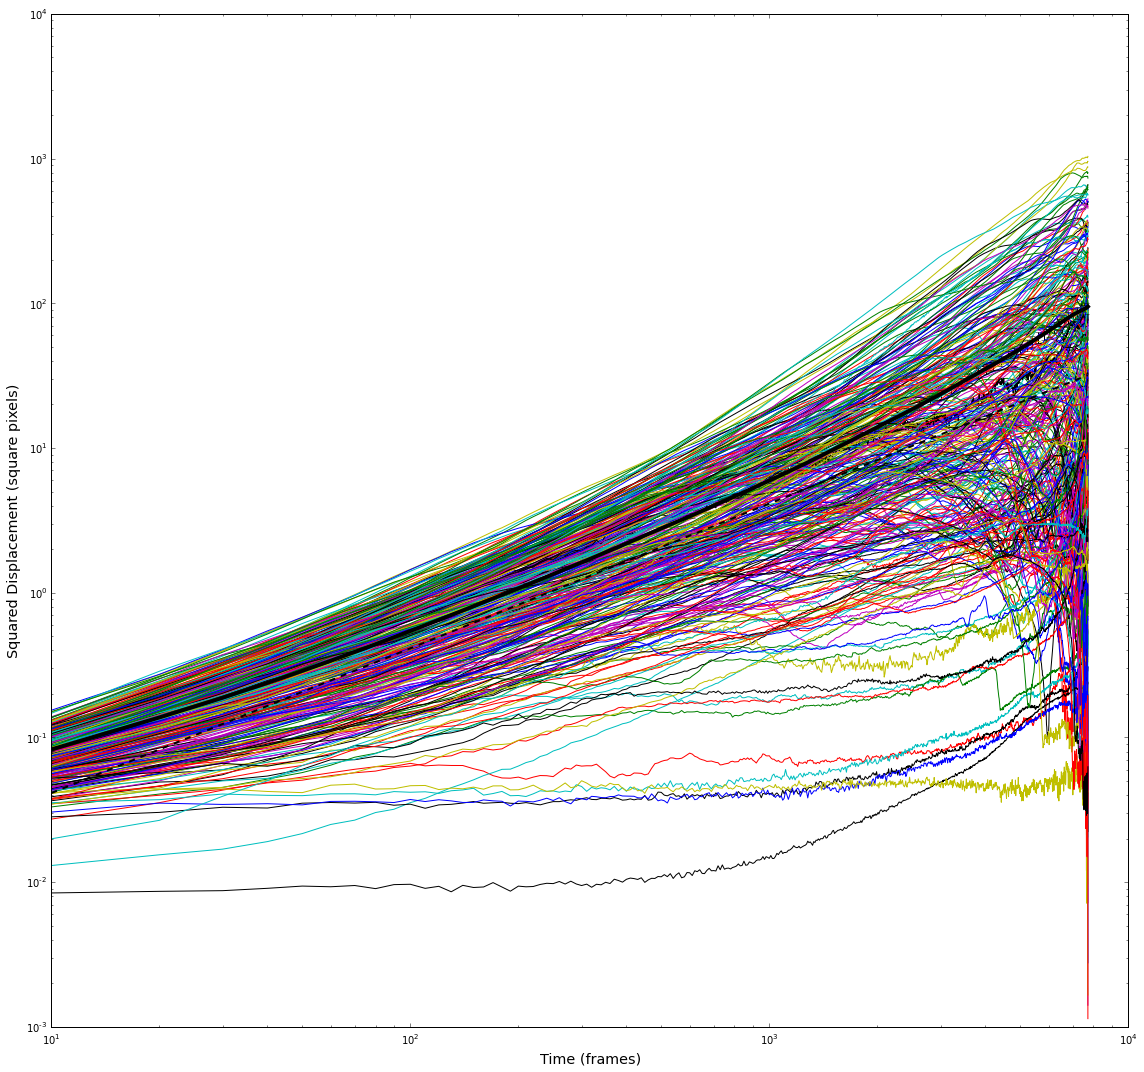

In [221]:
tracks.plot_msd(msads, msadids, dtau, dt0, data[omask]['f'].max()+1, S=1, fps=1, prefix=prefix
                , figsize=(16,15), show_tracks=False, meancol='k',lw=4, errorbars=20
                , xlim=None#(dtau/fps,64)
                , ylim=None#(3e-2, 3e2)
                , title='', tnormalize=0
                , kill_flats=0.03
                , kill_jumps=.9
                , save='')#savedir+prefix+'_MSD.pdf')

# Translational MSDs

In [148]:
def diff_const(taus, msd, tau_start=None, tau_end=None,
               msd_err=None, fit=True, nargs=1):
    if tau_start == 'min': tau_start = np.argmin(msd/taus)
    if tau_end  ==  'min': tau_end  =  np.argmin(msd/taus)
    start = np.searchsorted(taus, tau_start) if tau_start else None
    end = np.searchsorted(taus, tau_end) if tau_end else None
    if fit:
        return curve_fit(powerlaw, taus[start:end], msd[start:end],
                         [1]*nargs, msd_err[start:end], True)
    else:
        mt = msd[start:end]/taus[start:end]
        w = 1/msd_err[start:end] if msd_err is not None else None
        d  = np.average(mt, weights=w)
        dd = np.average((mt - d)**2, weights=w)
        return d, dd

def powerlaw(t, d, b=1, c=0):
    """
    params:
    d prefactor
    b exponent
    c offset
    """
    return c + d * np.power(t, b)

def chained_power(t, d1, d2, b1=1, b2=1, c1=0, c2=0, ret_crossover=False):
    p1 = powerlaw(t, d1, b1, c1)
    p2 = powerlaw(t, d2, b2, c2)
    cp = np.maximum(p1, p2)
    if ret_crossover:
        ct = t[np.abs(p1-p2).argmin()]
        print ct
        ct = np.power(d1/d2, np.reciprocal(b2-b1))
        print ct
        return cp, ct
    else:
        return cp

def cage_time(taus, msd, msd_err=None):
    nargs = 3 # 2 for prefactor, 2 more for exponent.
              # 1 for exponent (nargs=3) forces one section to be diffusive.
    cpopt, cpcov = curve_fit(chained_power, taus, msd, [1]*nargs, msd_err)
    d1, d2, b1 = cpopt
    ct = np.power(d1/d2, np.reciprocal((b2 if nargs > 3 else 1)-b1))
    return cpopt, ct

In [149]:
# densities with good translational _and_ angular diffusive behavior
# for looking at MSD, MSAD simultaneously
ns_AT = np.setdiff1d(ns_all[ns_all<370], [296,328,344,352])
ni_AT = np.searchsorted(ns_all, ns_AT)
dens_AT = densities[margin][ni_AT]

In [150]:
if True:
    # load all averaged MSDS
    MSDS = np.load(locdir + "MSDS.npz")
else:
    # calculate average of all MSDS
    MSDS = {}
    # Calculate the MSDS 
    # Translational kill thresholds:
    kill_flats = defaultdict(lambda: 0.5, # units are pixels
                        { 16: 1, 32: 3, 48: 1, 64: 0.5, 80: 1, 96: 0.2, 112: 0.7,
                         128: 0.6, 144: 1, 160: 10, 176: 1, 192: 0.4, 336: 1,
                         360: 0.1, 368: .6, 400: 0.2, 464: 0.2 })
    kill_jumps = defaultdict(lambda: 100, {})
    for n in ns_all:
        prefix = 'n{:03d}'.format(n)
        msdnpz = np.load(locdir+prefix+"_MSD.npz")
        msds = msdnpz['msds']
        if 'dt0' in msdnpz.keys():
            dt0  = msdnpz['dt0'][()] # [()] gets element from 0D array
            dtau = msdnpz['dtau'][()]
        else:
            print "assuming dt0 = dtau = 10" # ok for before dt* was saved
            dt0  = 10
            dtau = 10
        print "averaging track MSDs"
        nframes = max([np.array(msd)[:,0].max() for msd in msds]) + 1
        taus = np.arange(dtau, nframes, dtau)
        msd, msd_err = tracks.mean_msd(msds, taus, errorbars=True,
                                kill_flats=kill_flats[n],
                                kill_jumps=kill_jumps[n])
        MSDS[str(n)] = np.row_stack([taus, msd, msd_err])

In [151]:
ns_T = np.asarray(MSDS.files, int); ns_T.sort()
ni_T = np.searchsorted(ns_all, ns_T)
dens_T = densities[margin][ni_T]
ns_T

array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
       224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
       344, 352, 360, 368])

In [152]:
# find coeffient of diffusion
ds, bs, ctopts, cts, dds, dbs = [],[],[],[],[],[]
for n in ns_T:
    taus, msd, msd_err = MSDS[str(n)] / [[fps], [A], [A]]
    tau_start = 10
    tau_end   = None
    d, dd = diff_const(taus, msd, tau_start, tau_end, msd_err, fit=True)
    ctopt, ct = cage_time(taus, msd, msd_err)
    if len(np.atleast_1d(d)) > 1:
        d, b = d
        dd, db = np.diag(dd)
        bs.append(b)
        dbs.append(db)
    ds.append(d)
    dds.append(dd)
    ctopts.append(ctopt)
    cts.append(ct)
ds = np.squeeze(ds)
dds = np.squeeze(dds)
if bs:
    bs = np.squeeze(bs)
    dbs = np.squeeze(dbs)

(0, 50)

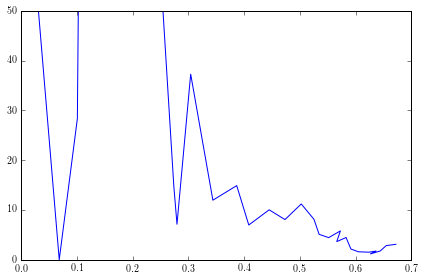

In [144]:
plt.plot(dens_T, cts)
plt.ylim(0,50)

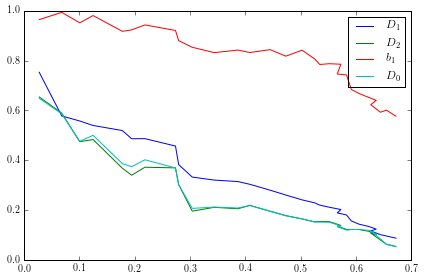

In [146]:
plt.plot(dens_T, ctopts)
plt.plot(dens_T, ds)
plt.legend(['$D_1$','$D_2$','$b_1$', '$D_0$'])

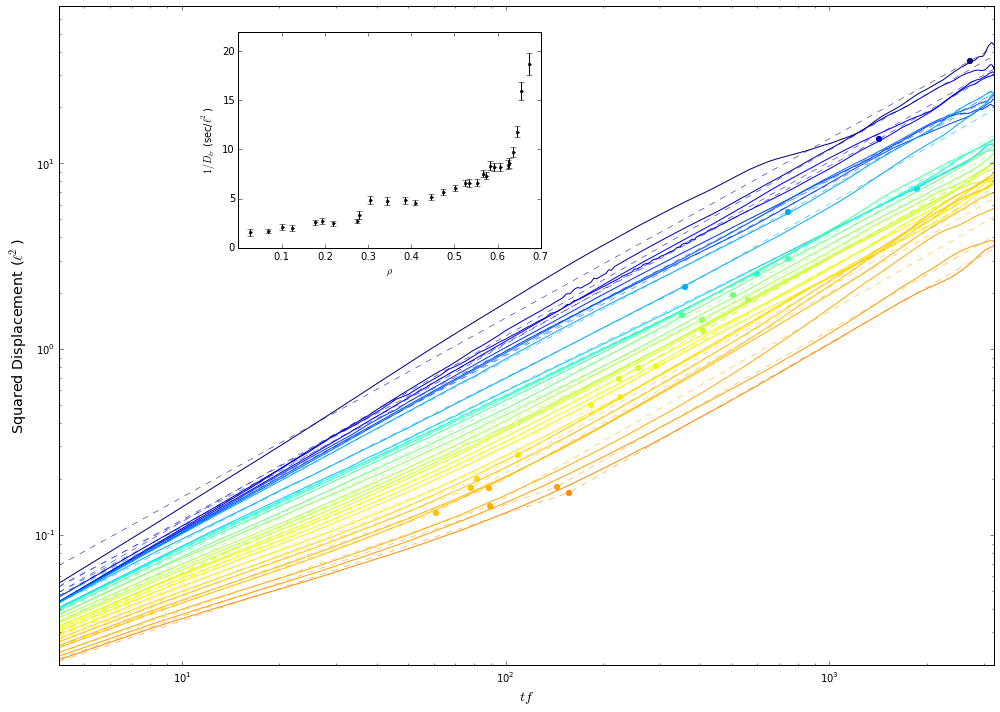

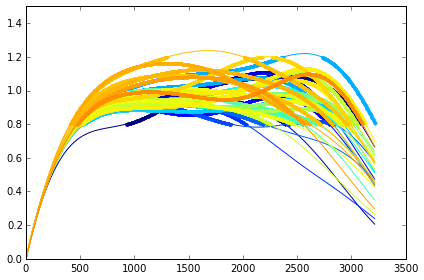

In [169]:
# Plot MSD and fits
save = False
tn = 0 # divide out this many powers of tau
flip = True # plot 1/D instead of D

rc('text', usetex=save)
dsd = 0**2 / A # uncert in squared disp (in pixels)
fig = plt.figure(figsize=(6,5) if save else (14,10))
main = plt.gca()
inset = plt.axes([.24,.65,.3,.3])
mp = main
dp = inset
plt.figure()
for n, d, ctopt, ct in zip(ns_T, ds, ctopts, cts):
    taus, msd, msd_err = MSDS[str(n)] / [[fps], [A], [A]]
    c = col(density[margin][n])
    mp.plot(taus*freq, (msd-dsd)/taus**tn, c=c)
    #mp.plot(taus*freq, powerlaw(taus, d)/taus**tn,
    #        '--', lw=.5, c=c)
    mp.plot(taus*freq, chained_power(taus, *ctopt)/taus**tn,
            '--', lw=.5, c=c)
    mp.plot(ct*freq, chained_power(ct, *ctopt)/ct**tn,
            'o', c=c, mec='none')
    llx, lls = helpy.loglog_slope(taus*freq, gaussian_filter(msd, 100, mode='nearest'))
    plt.plot(llx, lls, c=c)
    diffusive = np.abs(lls-1) < .2
    plt.plot(llx[diffusive], lls[diffusive], '.', c=c)
    plt.ylim(0, 1.5)
    #plt.xscale('log')

    if False:#not save: 
        label_loc = (msd/taus).argmin()
        x = taus[label_loc]
        y = msd[label_loc] / x**tn
        mp.text(x, y, n, color=c)
# plot the first one, times three, to show 'slope=1' guideline
#plt.plot(taus, 3*powerlaw(taus, ds[0]), 'k--')#, lw=.5, c=col(density[margin][n]))
mp.set_yscale('log')
mp.set_xscale('log')
tunit = 'seconds' if fps>1 else 'image frames'
yunit = r'$\ell^2{0}$' if A>1 else '$pixels^2{0}$'
yunit = yunit.format((' / '+tunit) if tn else '')
ylabel = 'Squared Displacement{} ({})'.format(' / Time' if tn else '', yunit)
mp.set_xlabel('$tf$', fontsize='x-large')
#mp.set_xlabel(r'Time ({})'.format(tunit), fontsize='x-large')
mp.set_ylabel(ylabel, fontsize='x-large')
mp.set_xlim(dtau*freq/fps, taus[-1]*freq)
mp.set_ylim((.05, 1) if tn==1 else (.02,70))

D = np.reciprocal(ds) if flip else ds
dp.errorbar(dens_T, D, D*D*np.sqrt(dds*len(taus)), fmt='.', label='D', color='k')
dp.set_ylim(0, 22 if flip else .85)
dp.set_xticks(np.arange(.1,.8,.1))
dp.set_xlabel(r'$\rho$')
dp.set_ylabel('${}D_{{tr}}$ ({}/{})'.format('1/' if flip else '',
                                            *[r'$\ell^2$', 'sec'][::-1 if flip else 1]))

if save:
    savename = savedir + "MSD{}vN.pdf".format('_t'*tn)
    # = locdir+"MSDvN_dt0=%d_dtau=%d.png"%(dt0,dtau)
    # = locdir + "MSDvN_dsd=%d.png"%dsd
    fig.savefig(savename)

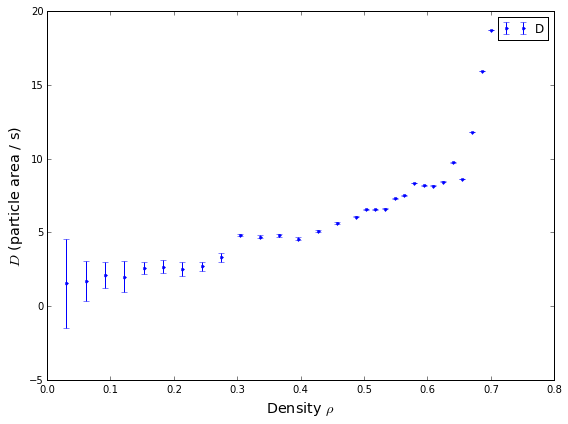

In [41]:
plt.figure(figsize=(8,6))
if bs:
    plt.errorbar(dens_T, bs, np.sqrt(dbs), fmt='.', label='b')
plt.errorbar(dens_T, 1/ds, np.sqrt(dds)*len(taus)*ds, fmt='.', label='D')
#plt.title("Constant of diffusion vs. density")
plt.xlabel(r"Density $\rho$", fontsize='x-large')
unit = '(particle area'
plt.ylabel("$D$ "+(unit+' / s)' if fps>1 else r"$pix^2/frame$"), fontsize='x-large')
#plt.ylim(0, 1)#np.max(ds)*1.2)
#plt.gca().set_yscale('log')
plt.legend(loc='best')
#plt.savefig(locdir+"DvN.pdf")#"DvN_dt0=%d_dtau=%d.png"%(dt0,dtau))

#Angular MSDs

In [172]:
if True:
    # load all averaged MSADS
    MSADS = np.load(locdir + "MSADS.npz")
else:
    # calculate average of all MSADS
    MSADS = {}
    # Angular:
    kill_flats = defaultdict(lambda: 0, {48: 5, 344: 0.03})
    kill_jumps = defaultdict(lambda: 1,
                    {16: 10, 32: 5, 48: 1, 64: 2, 80: 1, 96: 1, 344: .5, 448: 0.1,
                     456: 0.1, 464: 0.1})
    for n in ns_A:
        prefix = 'n{:03d}'.format(n)
        msadnpz = np.load(locdir+prefix+"_MSAD.npz")
        msads = msadnpz['msds']
        if 'dt0' in msadnpz.keys():
            dt0  = msadnpz['dt0'][()] # [()] gets element from 0D array
            dtau = msadnpz['dtau'][()]
        else:
            print "assuming dt0 = dtau = 10" #  should be true for all from before dt* was saved
            dt0  = 10
            dtau = 10
        print "averaging track MSADs"
        nframes = max([np.array(msad)[:,0].max() for msad in msads]) + 1
        taus = np.arange(dtau, nframes, dtau)
        msad, msad_err = mean_msd(msads, taus, errorbars=True,
                                kill_flats=kill_flats[n],
                                kill_jumps=kill_jumps[n])
        MSADS[str(n)] = np.row_stack([taus, msad, msad_err])

In [173]:
ns_A = np.asarray(MSADS.files, int); ns_A.sort()
ni_A = np.searchsorted(ns_all, ns_A)
dens_A = densities[margin][ni_A]
ns_A

array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
       224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
       344, 352, 360, 368])

In [174]:
# find coeffient of angular diffusion
das, bas, ddas, dbas = [], [], [], []
for n in ns_A:
    taus, msad, msad_err = MSADS[str(n)]
    tau_start = None
    tau_end   = 2
    d, dd = diff_const(taus/fps, msad, tau_start, tau_end, msd_err, fit=True)
    if len(np.atleast_1d(d)) > 1:
        d, b = d
        dd, db = np.diag(dd)
        bas.append(b)
        dbas.append(db)
    das.append(d)
    ddas.append(dd)
das = np.squeeze(das)
ddas = np.squeeze(ddas)
if bas:
    bas = np.squeeze(bas)
    dbas = np.squeeze(dbas)

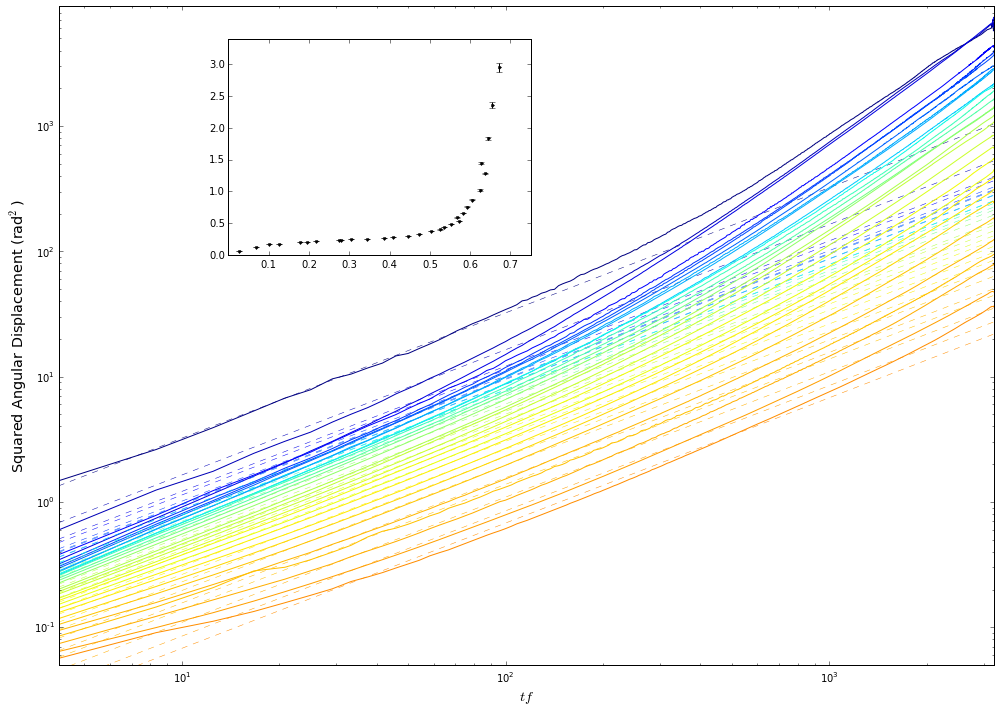

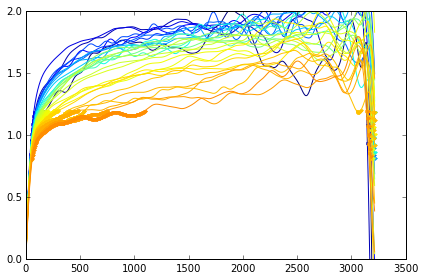

In [177]:
# Plot MSAD and fits
save = False
tn = 0 # divide out this many powers of tau
flip = True # plot 1/D instead of D

rc('text', usetex=save)
dsd = 0**2 # uncert in squared disp (in radians)
fig = plt.figure(figsize=(6,5) if save else (14,10))
main = plt.gca()
inset = plt.axes([.23,.64,.3,.3])
mp = main
dp = inset
plt.figure()
for n, d in zip(ns_A, das):
    taus, msd, msd_err = MSADS[str(n)]
    taus = taus/fps
    c = col(density[margin][n])
    mp.plot(taus*freq, (msd-dsd)/taus**tn, c=c)
    mp.plot(taus*freq, powerlaw(taus, d)/taus**tn,
             '--', lw=.5, c=c)
    llx, lls = helpy.loglog_slope(taus*freq, gaussian_filter(msd, 10, mode='nearest'))
    plt.plot(llx, lls, c=c)
    diffusive = np.abs(lls-1) < .2
    plt.plot(llx[diffusive], lls[diffusive], '.', c=c)
    plt.ylim(0,2)
    if False:#not save: 
        label_loc = (msd/taus).argmin()
        x = taus[label_loc]
        y = msd[label_loc] / x**tn
        mp.text(x, y, n, color=c)
# plot the first one, times three, to show 'slope=1' guideline
#plt.plot(taus, 3*powerlaw(taus, ds[0]), 'k--')#, lw=.5, c=col(density[margin][n]))
mp.set_yscale('log')
mp.set_xscale('log')
tunit = 'seconds' if fps>1 else 'image frames'
yunit = 'rad$^2{0}$' if A>1 else '$pixels^2{0}$'
yunit = yunit.format((' / '+tunit) if tn else '')
ylabel = 'Squared Angular Displacement{} ({})'.format(' / Time' if tn else '', yunit)
#mp.set_xlabel(r'Time ({})'.format(tunit), fontsize='x-large')
mp.set_xlabel('$tf$', fontsize='x-large')
mp.set_ylabel(ylabel, fontsize='x-large')

mp.set_xlim(dtau*freq/fps, taus[-1]*freq)
mp.set_ylim((.2, 200) if tn else (.05, 9e3))

D = np.reciprocal(das) if flip else das
dp.errorbar(dens_A, D, D*D*np.sqrt(ddas*len(taus)), fmt='.', label='D_ang', color='k')
dp.set_xlim(0, .75)
dp.set_ylim(0, 3.4 if flip else 18)
dp.set_xticks(np.arange(.1, .8, .1))
#dp.set_yticks(dp.get_yticks()[:-1])

if save:
    dp.set_xlabel(r'$\rho$')
    dp.set_ylabel('${0}D_{{ang}}$ ({1}/{2})'.format('1/' if flip else '',
                                                    *['rad$^2$', 'sec'][::-1 if flip else 1]))
    savename = savedir + "MSAD{}vN.pdf".format('_t'*tn)
    # = locdir+"MSADvN_dt0=%d_dtau=%d.png"%(dt0,dtau)
    # = locdir + "MSADvN_dsd=%d.png"%dsd
    fig.savefig(savename)

#Angular vs Translational diffusion

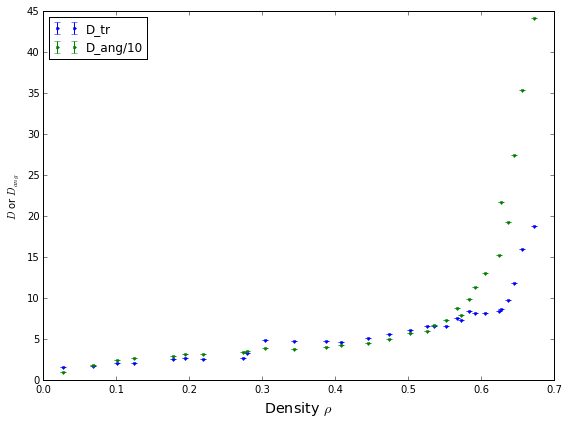

In [194]:
save = False
plt.figure(figsize=(8,6))
rc('text', usetex=save)
if bs:
    plt.errorbar(dens_T, bs, np.sqrt(dbs), fmt='.', label='b_tr')
    plt.errorbar(dens_T, bas, np.sqrt(dbas), fmt='.', label='b_ang')
plt.errorbar(dens_T, 1/ds, np.sqrt(dds), fmt='.', label='D_tr')
plt.errorbar(dens_A, 15/das, np.sqrt(ddas), fmt='.', label='D_ang/10')
plt.xlabel(r"Density $\rho$", fontsize='x-large')
plt.ylabel("$D$ or $D_{ang}$")
#plt.ylim(0, None)#np.max(ds)*1.2)
plt.legend(loc='best')
if save: plt.savefig(savedir+'Ds.pdf')

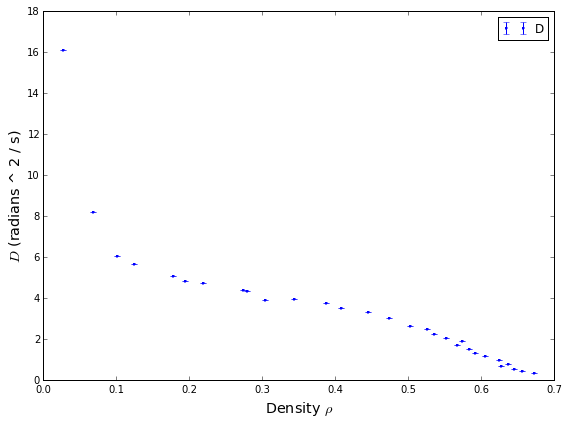

In [200]:
save = False
plt.figure(figsize=(8,6))
rc('text', usetex=save)
if bas: plt.errorbar(dens_A, bas, np.sqrt(dbas), fmt='.', label='b')
plt.errorbar(dens_A, das, np.sqrt(ddas)/fps, fmt='.', label='D', mec='none')
#plt.title("Constant of diffusion vs. density")
plt.xlabel(r"Density $\rho$", fontsize='x-large')
unit = '(radians ^ 2'
plt.ylabel("$D$ "+(unit+' / s)' if fps > 1 else unit+r"/frame)"), fontsize='x-large')
plt.ylim(0, None)#np.max(ds)*1.2)
#plt.gca().set_yscale('log')
plt.legend(loc='best')
if save: plt.savefig(locdir+"DAvN.pdf")#"DvN_dt0=%d_dtau=%d.png"%(dt0,dtau))

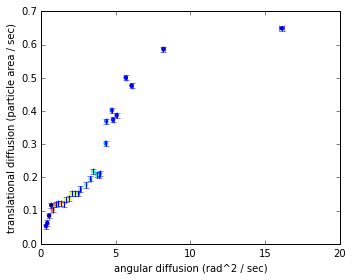

In [99]:
save = False
rc('text', usetex=save)
plt.figure(figsize=(5,4))
plt.errorbar(das, ds, np.sqrt(ddas*len(taus)), np.sqrt(dds*len(taus)), ls='', marker=',')
plt.scatter(das, ds, facecolor=col(dens_AT), lw=0)
plt.xlim(0, 20)
plt.ylim(0, .7)
plt.xlabel('angular diffusion (rad^2 / sec)')
plt.ylabel('translational diffusion (particle area / sec)')
if save: plt.savefig(savedir+'DvD.pdf')

In [147]:
np.intersect1d(ns_T, ns_A), ns_AT

(array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
        224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
        344, 352, 360, 368]),
 array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
        224, 240, 256, 264, 272, 280, 288, 304, 312, 320, 336, 360, 368]))

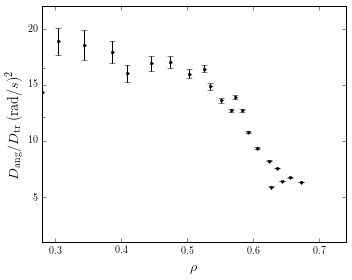

In [193]:
# Plot the Ratio of Diffusion Coefficients
# D_ratio = D_ang / D_trans
save = True
flip = False  # ang/trans unless flipped
rc('text', usetex=save)
plt.figure(figsize=(5,4))

ns = np.intersect1d(ns_T, ns_A)
iT = np.searchsorted(ns_T, ns)
iA = np.searchsorted(ns_A, ns)
ratio = das[iA]/ds[iT]
if flip: ratio = 1/ratio
plt.errorbar(dens_A, ratio, ratio*np.sqrt((dds[iT]*das[iA]**2 + ddas[iA]*ds[iT]**2)*len(taus))
             , marker='.', ls='', color='k')
if save:
    order = -1 if flip else 1
    plt.ylabel('$D_{} / D_{}$ '.format(*[r'\mathrm{ang}', r'\mathrm{tr}'][::order]) +\
               '({}/{})$^2$'.format(*['rad','$s$'][::order]),
               fontsize='x-large')
    plt.xlabel(r'$\rho$', fontsize='x-large')
plt.ylim((0,.2) if flip else (1, 22))
plt.xlim(.28, .74)
plt.xticks(np.arange(.3, .8, .1))
if save: plt.savefig(savedir + "D_ratio.pdf")

# Angle-position Correlation $\langle \vec r \hat n \rangle$

In [87]:
# Build up data dicts by track for all datasets
#alltracksets = {}
#allotracksets = {}
for n in ns_all[::5]:
    if n in alltracksets and n in allotracksets: continue
    data, tracksets, odata, otracksets, msds, msdids, msads, msadids, dtau, dt0 = loadall(n)
    alltracksets[n] = tracksets
    allotracksets[n] = otracksets

In [128]:
# Calculate all <rn> correlations
# That is, <x cos(phi)> and <y sin(phi)>
#alloxcorr = {}
#alloycorr = {}
corr_args = {'side': 'both', 'ret_dx': True, 'cumulant': True}
for n in [16, 96, 256, 376, 416, 456]:
    #if n in alloxcorr and n in alloycorr: continue
    print "{:3d}, {:5.1%}".format(n, density[2][n]),
    tracksets = alltracksets[n]
    otracksets = allotracksets[n]
    #print [track for track in tracksets.keys()]
    #print [len(tracksets[track]) for track in tracksets.keys()]
    alloxcorr[n] = {track: corr.crosscorr(tracksets[track]['x']/S,
                                               np.cos(4*otracksets[track]), **corr_args)
                         for track in tracksets.keys() if len(tracksets[track]) >= 1000}
    alloycorr[n] = {track: corr.crosscorr(tracksets[track]['y']/S,
                                               np.sin(4*otracksets[track]), **corr_args)
                         for track in tracksets.keys() if len(tracksets[track]) >= 1000}
    print "... done!"

  16,  2.8% ... done!
 96, 19.5% ... done!
256, 50.3% ... done!
376, 68.5% ... done!
416, 76.3% ... done!
456, 85.7% ... done!


<type 'numpy.ndarray'>
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): 0.0241697884401
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): 0.00637683269532
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): 0.0130753748315
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): 0.078832903545
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): 0.00206405691787
(399,) (399,) (399,)
bounds: 0 10
trange: -82.9166666667 82.9166666667 (399,)
tlims:  0 10
max corr (approx v0/D_R): -0.0415764405996


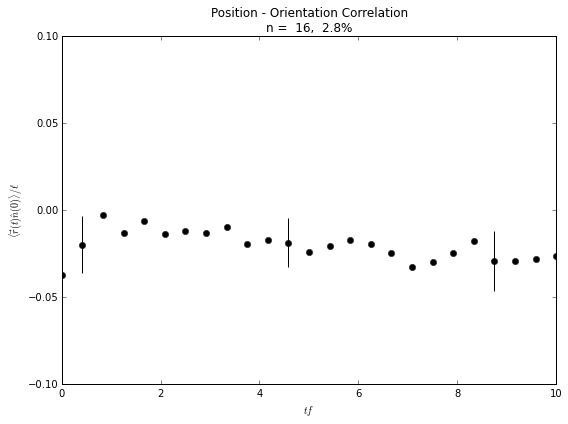

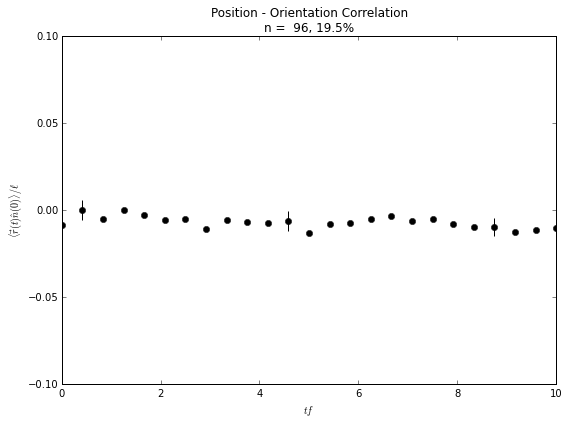

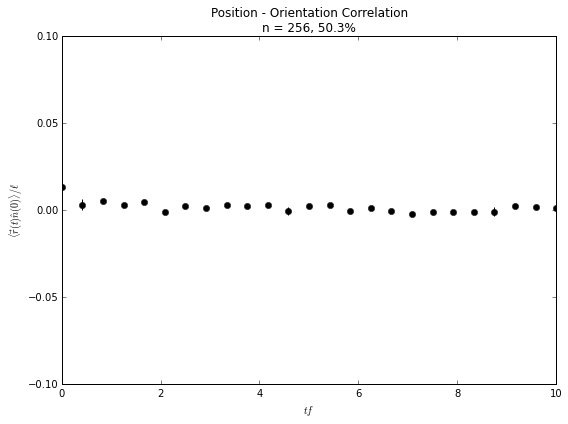

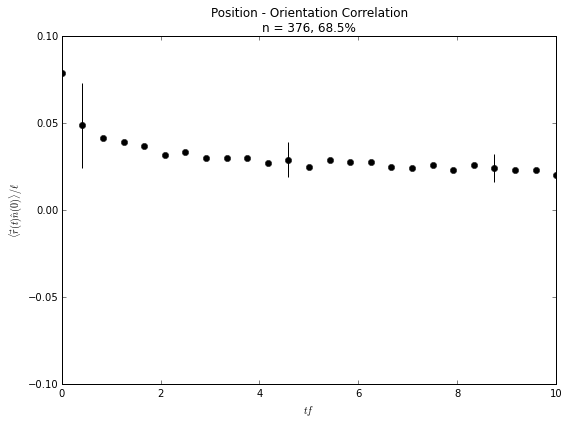

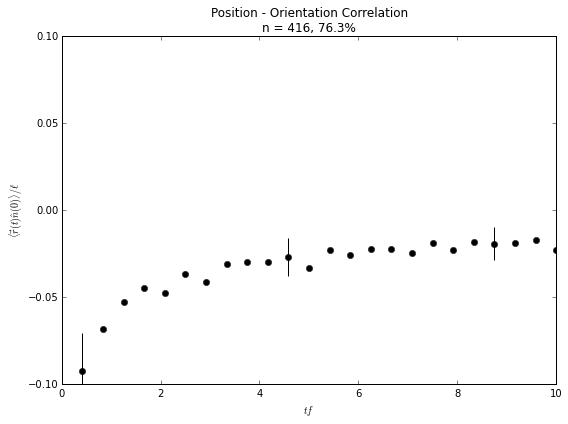

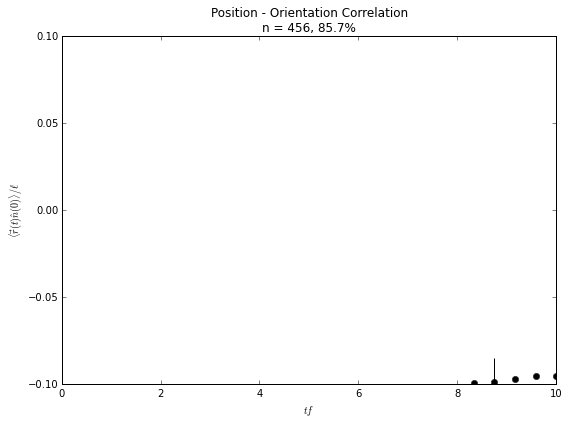

In [146]:
# Average, Fit and plot <rn> correlation
do_fit = False
save = False
rc('text', usetex=save)
print type(allcorr)
nframes = 200
tcorr = np.arange(nframes)*freq/fps
for n in sorted(alloxcorr):
    allcorr = []
    plt.figure(figsize=smallfig if save else largefig)
    prefix = n
    for track in allotracksets[prefix]:
        if len(allotracksets[prefix][track]) < 1000: continue
        tcorr = alloxcorr[prefix][track][0]
        index = np.abs(tcorr) < nframes
        oxcorr = alloxcorr[prefix][track][1][index]
        oycorr = alloycorr[prefix][track][1][index]
        tcorr = tcorr[index]*freq/fps
        allcorr.append(oxcorr)
        allcorr.append(oycorr)
        #plt.plot(tcorr, oxcorr, 'g', alpha=.25)
        #plt.plot(tcorr, oycorr, 'b', alpha=.25)
    allcorr = helpy.pad_uneven(allcorr)
    meancorr = np.nanmean(allcorr, 0)
    errcorr = np.nanstd(allcorr, 0)/sqrt(len(allcorr))
    err_offset = np.abs(errcorr.mean())
    tmin, tmax = 0 if corr_args['side']=='right' else 0, 0 if corr_args['side']=='left' else 10
    print tcorr.shape, meancorr.shape, errcorr.shape
    plt.errorbar(tcorr, meancorr, errcorr, None, 'ok', capthick=0, elinewidth=1, errorevery=10)
    xlims = max(tmin, tcorr.min()), min(tmax, tcorr.max())
    print "bounds:", tmin, tmax
    print "trange:", tcorr.min(), tcorr.max(), tcorr.shape
    print "tlims: ", xlims[0], xlims[1]
    plt.xlim(*xlims)
    #plt.ylim(1e-2, 2)

    print 'max corr (approx v0/D_R):', meancorr.max()

    if do_fit:
        fmin = np.searchsorted(tcorr, 0)
        fmax = np.searchsorted(tcorr, tmax)
        print 'flims: ', fmin, fmax
        print 'fitlims: ', tcorr[fmin], tcorr[fmax]
        fitform = corr.powerlaw
        #fitform = lambda s, v_D, dx0=0, D=D_R: v_D*(1 - corr.exp_decay(s-dx0, 1/D))
        p0 = [1, 1]
        popt, pcov = curve_fit(fitform, tcorr[fmin:fmax], meancorr[fmin:fmax],
                               p0=p0, sigma=err_offset + errcorr[fmin:fmax]
                               )
        print "\nFits:"
        print '\n'.join(['time: {:.1f}', 'amp: {:.3f}', 'offset: {:.3f}'][:len(popt)]).format(*popt)
        fit = fitform(tcorr, *popt)
        plt.plot(tcorr, fit, 'r', lw=2,
                     label='$t_0$: {:.3f}, $A$: {:.3f}'.format(*popt)
                    )
        pguess = {
                 16: (1, 0),
                 96: (1, 0),
                 256:(1, 0),
                 376:(1,.2),
                 416:(2,.4),
                 456:(2,.5),
        }
        #guess = fitform(tcorr, *pguess[n])
        #plt.plot(tcorr, guess, 'y', lw=2,
        #             label=r'$A e^{t/t_0}$'+'\n'+
        #                    '$t_0$: {:.3f}, $A$: {:.3f}'.format(*pguess[n])
        #            )
    plt.ylim(-.1, .1)
    plt.xlim(*xlims)
    #plt.yscale('log'); plt.ylim(1e-3,.5)
    #plt.xscale('log'); plt.xlim(1, xlims[1])
    plt.title("Position - Orientation Correlation\n"
              "n = {:3d}, {:5.1%}".format(n, density[2][n]))
    plt.ylabel(r"$\langle \vec r(t) \hat n(0) \rangle / \ell$")
    plt.xlabel("$tf$")
    plt.legend(loc=0, framealpha=1)

#Tracks

In [ ]:
nframes = data['f'].max() + 1
nframeso = data['f'][omask].max() + 1

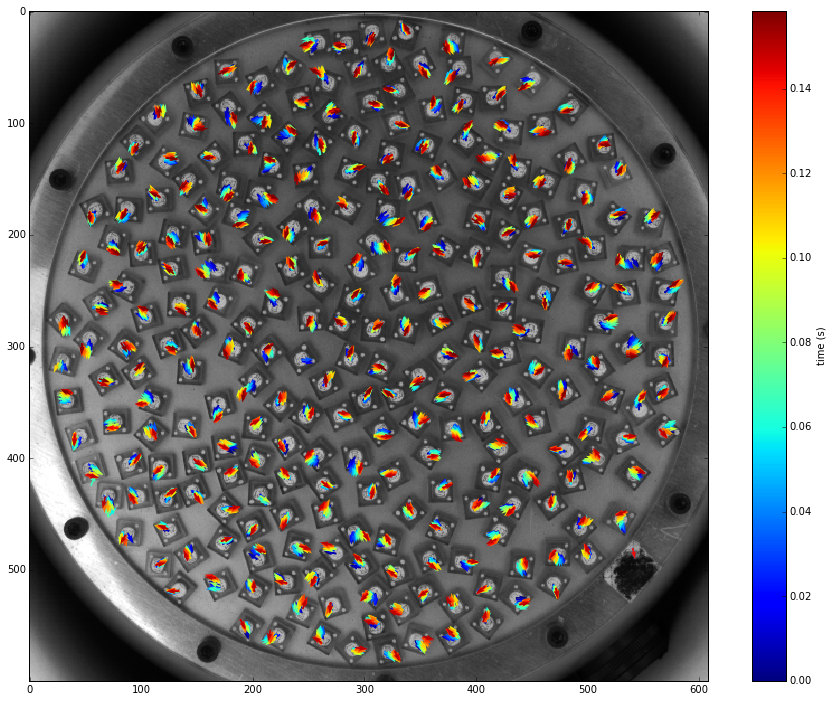

(<matplotlib.quiver.Quiver at 0x10baf63d0>,
 <matplotlib.colorbar.ColorbarBase instance at 0x10baf3f80>)

In [8]:
orient.plot_orient_quiver(data[:5000], odata[:5000], omask[:5000], imfile=locdir+prefix+'_0001.tif', fps=120,
                          figsize=(16,12), savename='')#savedir + 'quiver_tracks.png')

tracks used are set([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34])


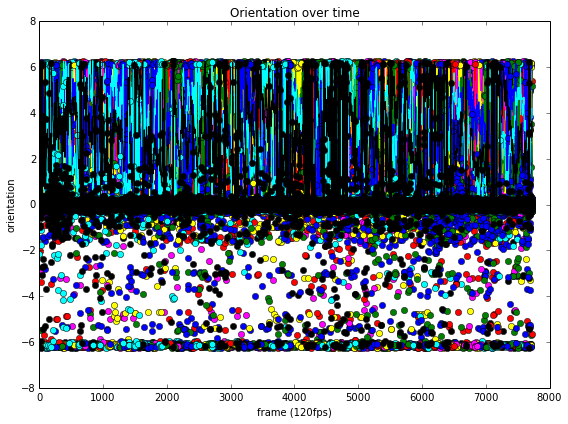

In [7]:
orient.plot_orient_time(data,odata,trackids,delta=True)#,simplify=True)

tracks used are set([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34])


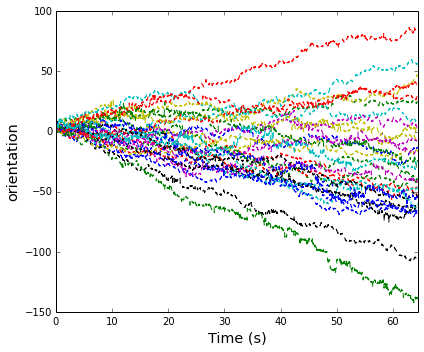

In [151]:
orient.plot_orient_time(data, odata, trackids, fps=fps, delta=False, save='savedir' + orient_tracking.pdf')

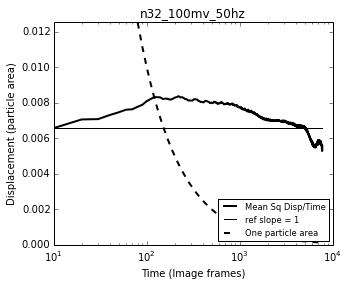

In [92]:
tracks.plot_msd(msds, msdids, dtau, dt0, nframes, prefix=prefix, tnormalize=1)

using dtau = 10, dt0 = 10
Rough coefficient of diffusion: 8.14727780692
Rough diffusion timescale: 0.166666666667
saving to /Users/leewalsh/Physics/Squares/writing/graphics/MSAD.pdf


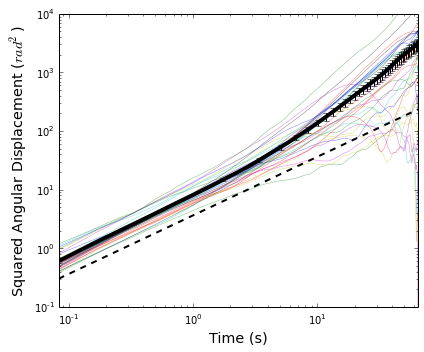

(array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
         120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
         230,  240,  250,  260,  270,  280,  290,  300,  310,  320,  330,
         340,  350,  360,  370,  380,  390,  400,  410,  420,  430,  440,
         450,  460,  470,  480,  490,  500,  510,  520,  530,  540,  550,
         560,  570,  580,  590,  600,  610,  620,  630,  640,  650,  660,
         670,  680,  690,  700,  710,  720,  730,  740,  750,  760,  770,
         780,  790,  800,  810,  820,  830,  840,  850,  860,  870,  880,
         890,  900,  910,  920,  930,  940,  950,  960,  970,  980,  990,
        1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100,
        1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210,
        1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
        1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
        1440, 1450, 1460, 1470, 1480, 

In [237]:
tracks.plot_msd(msads, msadids, dtau, dt0, nframeso, prefix=prefix, errorbars=20,
                 fps=fps, S=S, ang=True, show_tracks=True, figsize=(6,5), meancol='k', title="", lw=4,
                 xlim=(dtau/fps, 64), ylim=(1e-1,1e4), save=savedir + 'MSAD.pdf')

using dtau = 10, dt0 = 10
Rough coefficient of diffusion: 8.14727780692
Rough diffusion timescale: 0.166666666667
saving to ../writing/graphics/MSAD.pdf


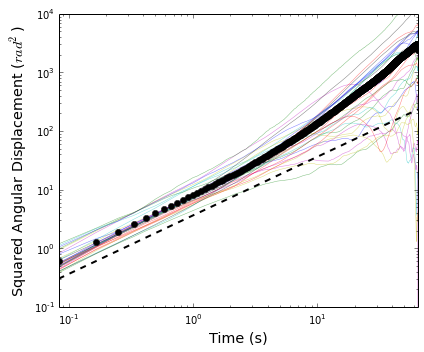

In [146]:
tracks.plot_msd(msads, msadids, dtau, dt0, nframeso, prefix=prefix,
                 fps=fps, S=S, ang=True, show_tracks=True, figsize=(6,5), meancol='k', title="",
                 xlim=(dtau/fps, 64), ylim=(1e-1,1e4), save='')#savedir + 'MSAD.pdf')

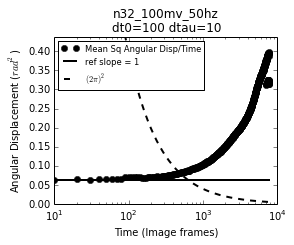

In [89]:
tracks.plot_msd(msads, msadids, dtau, dt0, nframeso, tnormalize=1, ang=True, prefix=prefix, show_tracks=False)

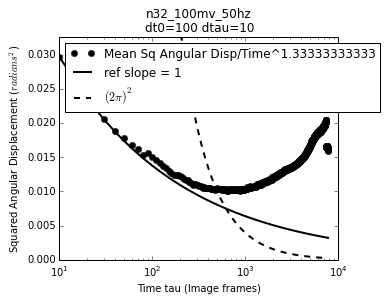

In [47]:
tracks.plot_msd(msads, msadids, dtau, dt0, nframeso, tnormalize=4./3, ang=True, prefix=prefix, show_tracks=False)

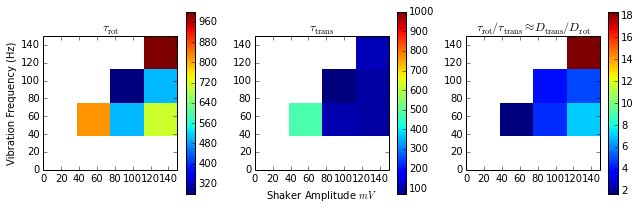

In [165]:
tau_trans = np.array([[ np.nan, np.nan, np.nan, np.nan],
                      [ np.nan, 480.,     110.,   100.],
                      [ np.nan, np.nan,    70.,   100.],
                      [ np.nan, np.nan, np.nan,   120.]])

tau_rot = np.array([[ np.nan, np.nan, np.nan, np.nan],
                    [ np.nan,   820.,   500.,   710.],
                    [ np.nan, np.nan,   280.,   500.],
                    [ np.nan, np.nan, np.nan,  2200.]])

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(tau_rot,origin='lower',extent=(0,150,0,150),interpolation='nearest',vmax=1000.)
plt.title(r"$\tau_\mathrm{rot}$")
plt.ylabel('Vibration Frequency (Hz)')
plt.colorbar()
plt.subplot(132)
plt.imshow(tau_trans,origin='lower',extent=(0,150,0,150),interpolation='nearest',vmax=1000.)
plt.title(r"$\tau_\mathrm{trans}$")
plt.xlabel('Shaker Amplitude '+r'$mV$')
plt.colorbar()
plt.subplot(133)
plt.imshow(tau_rot/tau_trans,origin='lower',extent=(0,150,0,150),interpolation='nearest')
plt.title(r"$\tau_\mathrm{rot}/\tau_\mathrm{trans}\approx D_\mathrm{trans}/D_\mathrm{rot}$")
plt.colorbar()
plt.savefig(savedir + 'D_f_A.pdf')

#Order Parameters

In [60]:
ns_all, ns

(array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
        224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
        344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440,
        448, 456, 464]),
 array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
        224, 240, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336,
        344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440,
        448, 456, 464]))

In [21]:
freq = 50

In [22]:
if True:
    Phi_npz = np.load(locdir+'phi_t.npz')
    Phi = {n: Phi_npz[str(n)] for n in ns_all}
else:
    Phi = {}
    for n in ns_all:
        data, trackids, odata, omask = load_data(n)
        Phi[n] = np.array([corr.orient_op(o['orient'], d[['x','y']].view((float,2)).copy()
                                          , m=4, margin=2, ret_complex=False)
                  for d, o in it.izip(helpy.splitter(data[omask], data['f'][omask]),
                                      helpy.splitter(odata[omask], data['f'][omask]))])
    np.savez(locdir + 'phi_t.npz', **{str(n): Phi[n] for n in ns_all})

In [85]:
np.savetxt(locdir+'all_phi_t', np.column_stack([Phi[n] for n in ns_all]),
          header=' '.join(map(str, ns_all)))

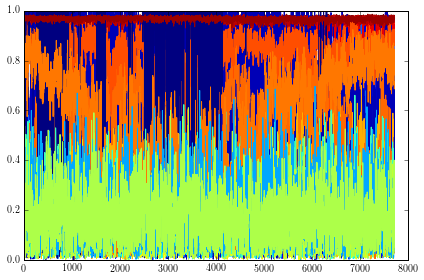

In [198]:
for n, P in reversed(Phi.items()):
    plt.plot(P, color=col(density[margin][n]))

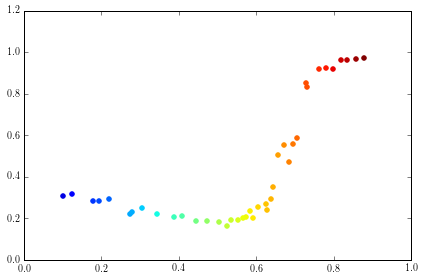

In [199]:
for n in ns_all:
    plt.scatter(density[margin][n], Phi[n].mean(), color=col(density[margin][n]))

In [23]:
nframes = len(Phi[16])

In [24]:
Phi_ac = {n: corr.autocorr(P) for n, P in Phi.iteritems()}

In [248]:
np.savetxt(locdir+'all_phiphi_newcorrfunc', np.column_stack([Phi_ac[n] for n in ns_all]),
          header=' '.join(map(str, ns_all)))

In [269]:
# Fit to poly_exp
Phi_ac_pe = {}
for n, Pac in Phi_ac.iteritems():
    x = np.arange(len(Pac))
    if not np.all(np.isfinite(Pac)):
        print n, 'not all finite'
        continue
    try:
        p, _ = curve_fit(corr.poly_exp, x, Pac, [1,1,1])
        Phi_ac_pe[n] = corr.poly_exp(x, *p)
    except RuntimeError:
        continue

16 not all finite
32 not all finite


In [249]:
# Gaussian smooth (low-pass)
Phi_ac_lp = {}
for n, Pac in Phi_ac.iteritems():
    g = [gaussian_filter(Pac, sig, mode='constant', cval=Pac[sig]) for sig in (1, 10, 100, 1000)]
    Phi_ac_lp[n] = np.choose(np.repeat([0,1,2,3], [10,90,900,len(Pac)-1000]), g)

In [25]:
Phi_ac_vg = { n: corr.vary_gauss(Pac, .1*np.arange(len(Pac))+.001*np.arange(len(Pac))**2) for n, Pac in Phi_ac.iteritems()}

In [189]:
Phi_ac_vg_a = { n: corr.vary_gauss(Pac, .1*np.arange(len(Pac))+.001*np.arange(len(Pac))**2) for n, Pac in Phi_ac.iteritems()}

In [190]:
Phi_ac_vg_b = { n: corr.vary_gauss(Pac, (0, .1, .001)) for n, Pac in Phi_ac.iteritems()}

In [260]:
Phi_ac_vg_c = { n: corr.vary_gauss(Pac, (0, .1, .0002)) for n, Pac in Phi_ac.iteritems()}

In [264]:
Phi_ac_vg_d = { n: corr.vary_gauss(Pac, (0, .2, .0002)) for n, Pac in Phi_ac.iteritems()}

In [266]:
Phi_ac_vg_e = { n: corr.vary_gauss(Pac, .1) for n, Pac in Phi_ac.iteritems()}

In [207]:
Phi_ac_vg_l = { n: corr.vary_gauss(Pac, (0, .1, .001)) for n, Pac in Phi_ac.iteritems()} # /len(ko)

In [210]:
Phi_ac_vg_1 = { n: corr.vary_gauss(Pac, (0, .1, .001)) for n, Pac in Phi_ac.iteritems()}

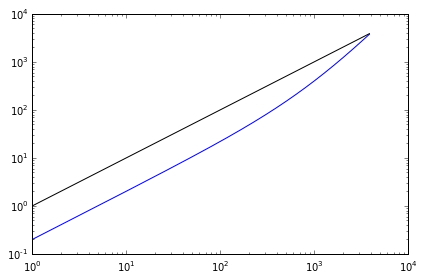

In [263]:
plt.loglog(poly.polyval(np.arange(3864), (0,.2,2e-4)))
plt.loglog(np.arange(3864), 'k')

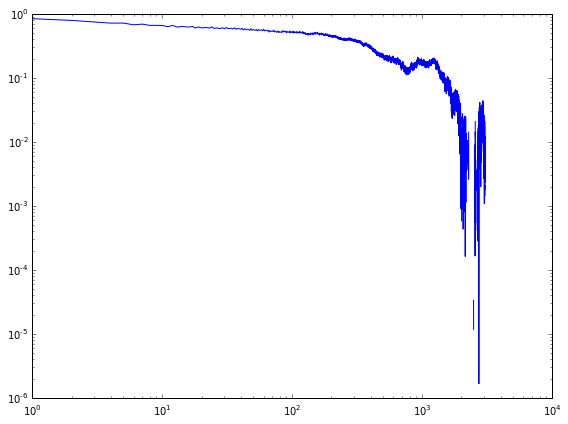

In [87]:
plt.figure(figsize=largefig)
plt.loglog(Phi_ac[n])

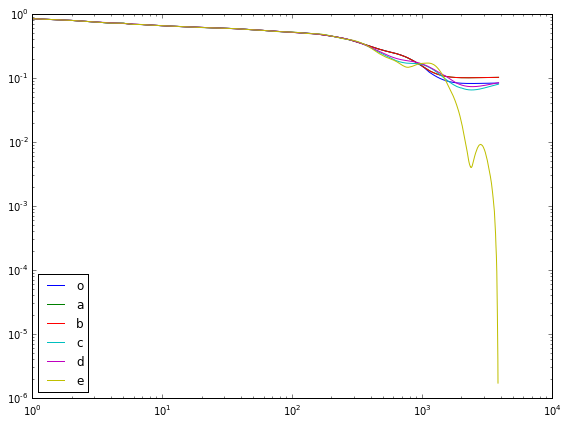

In [269]:
n = 416
plt.figure(figsize=largefig)
plt.loglog(np.column_stack([Phi_ac[n],
                            Phi_ac_vg[n],
                            Phi_ac_vg_a[n], Phi_ac_vg_b[n],
                            Phi_ac_vg_c[n], Phi_ac_vg_d[n],
                            Phi_ac_vg_e[n],
                           ]))
plt.legend('o a b c d e'.split(), loc='best')
#plt.ylim(.06, .2)
#plt.xlim(100,None)

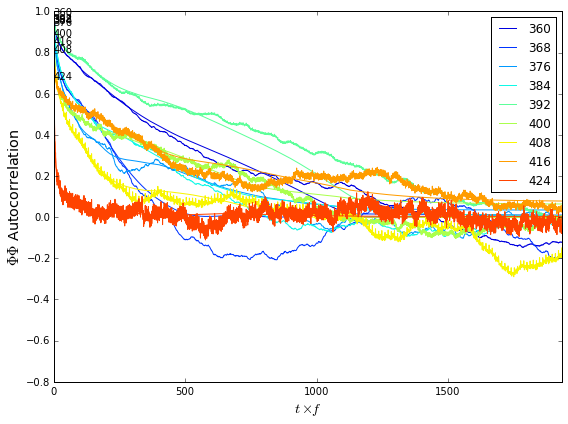

In [251]:
# Plot the Phi-Phi Autocorrelation
save = False
rc('text', usetex=save)
plt.figure(figsize=smallfig if save else largefig)
for n in [360, 368, 376, 384, 392, 400, 408, 416, 424]:
    Pac = Phi_ac[n]
    tf = np.arange(len(Pac))#*freq/fps
    try:
        plt.plot(tf, Phi_ac[n], color=col((n-350)/100), label=str(n))
        plt.plot(tf, np.maximum(Phi_ac_vg[n],0), color=col((n-350)/100))
        plt.text(tf[1],Phi_ac_vg[n][1], str(n)) 
    except KeyError:
        continue
    #plt.plot(tf, np.maximum(Pac,0), color=col(density[margin][n]), alpha=.8)
plt.legend(loc='best')
plt.yscale('linear')
plt.xscale('linear')
#plt.ylim(0, 1)
plt.xlim(freq/fps, nframes/4)
plt.ylabel(r'$\Phi\Phi$ Autocorrelation', fontsize='x-large')
plt.xlabel(r'$t\times f$', fontsize='x-large')
if save: plt.savefig(savedir + "phi_autocorr.pdf")

a, x0, sig = [  1.61997977e+02   7.02380592e-01   8.55275130e-02]


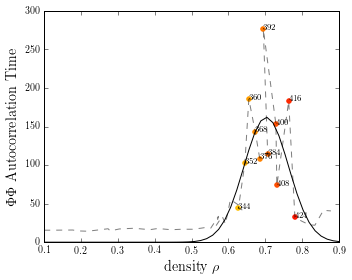

In [54]:
save = True
rc('text', usetex=save)
ns = ns_all

Phi_ac_fortime = Phi_ac
plt.figure(figsize=smallfig)
Phi_time = np.array([corr.decay_scale(Phi_ac_fortime[n], smooth='', method='int') for n in ns]) * freq/fps
for n, tau in zip(ns, Phi_time)[26:37]:
    plt.scatter(density[margin][n], tau, color=col(density[margin][n]))
    plt.text(density[margin][n], np.nan_to_num(tau), '{:d}'.format(n), fontsize='small')
plt.plot(densities[margin], Phi_time, 'k--', alpha=0.5)
p_phi, _ = curve_fit(gauss, densities[margin][np.isfinite(Phi_time)], Phi_time[np.isfinite(Phi_time)],
                     p0 = [100, .7, .2])
print 'a, x0, sig =', p_phi
plt.plot(np.linspace(0.1,0.9), gauss(np.linspace(0.1,0.9), *p_phi), 'k')
plt.xlim(.1,.9)
plt.ylim(0, None)
plt.xlabel(r'density $\rho$', fontsize='x-large')
plt.ylabel(r'$\Phi\Phi$ Autocorrelation Time', fontsize='x-large')
if save: plt.savefig(savedir+'phiphi_time.pdf')

In [32]:
if True:
    Psi_npz = np.load(locdir+'psi_t.npz')
    Psi = {n: Psi_npz[str(n)] for n in ns_all}
else:
    Psi = {}
    for n in ns_all:
        data, trackids, odata, omask = load_data(n)
        Psi[n] = np.array([corr.pair_angle_op(
                                   *corr.pair_angles(d[['x','y']].view((float,2)).copy(), 4,
                                                     margin=2, dub=2*S)[:2]
                           , m=4)[0]
                  for d, o in it.izip(helpy.splitter(data[omask], data['f'][omask]),
                                      helpy.splitter(odata[omask], data['f'][omask]))])
    np.savez(locdir + 'psi_t.npz', **{str(n): Psi[n] for n in ns_all})

In [88]:
np.savetxt(locdir+'all_psi_t', np.column_stack([Psi[n] for n in ns_all]),
          header=' '.join(map(str, ns_all)))

In [33]:
Psi_ac = { n: corr.autocorr(P) for n, P in Psi.iteritems()}

In [254]:
np.column_stack([Phi_ac[n] for n in ns_all]).shape

(3864, 42)

In [255]:
np.savetxt(locdir+'all_psi_psi_newcorrfunc', np.column_stack([Psi_ac[n] for n in ns_all]),
          header=' '.join(map(str, ns_all)))

In [215]:
# Gaussian smooth (low-pass)
Psi_ac_lp = {}
for n, Pac in Psi_ac.iteritems():
    g = [gaussian_filter(Pac, sig, mode='constant', cval=Pac[sig]) for sig in (1, 10, 100, 1000)]
    Psi_ac_lp[n] = np.choose(np.repeat([0,1,2,3], [10,90,900,len(Pac)-1000]), g)

In [34]:
Psi_ac_vg = { n: corr.vary_gauss(Pac, .2*np.arange(len(Pac))+.001*np.arange(len(Pac))**2)
             for n, Pac in Psi_ac.iteritems()}

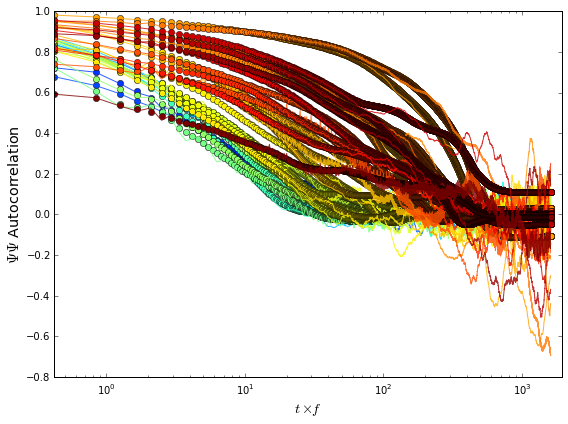

In [257]:
# Plot the Psi-Psi Autocorrelation
save = False
rc('text', usetex=save)
plt.figure(figsize=smallfig if save else largefig)
for n in ns_all:
    Pac = Psi_ac[n]
    tf = np.arange(len(Pac))*freq/fps
    plt.plot(tf, Psi_ac_vg[n], 'o', color=col(density[margin][n]))
    plt.plot(tf, Pac, color=col(density[margin][n]), alpha=.8)
plt.yscale('linear')
plt.xscale('log')
#plt.ylim(.1, 1)
plt.xlim(freq/fps, nframes/4)
plt.ylabel(r'$\Psi\Psi$ Autocorrelation', fontsize='x-large')
plt.xlabel(r'$t\times f$', fontsize='x-large')
if save: plt.savefig(savedir + "psi_autocorr.pdf")

a, x0, sig = [ 145.97203488    0.77059255    0.16774112]


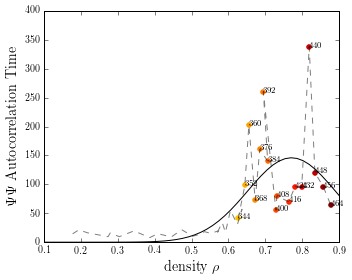

In [53]:
save = True
rc('text', usetex=save)

Psi_ac_fortime = Psi_ac_vg
plt.figure(figsize=smallfig)
ns = ns_all
Psi_time = np.array([corr.decay_scale(Psi_ac_fortime[n], smooth='', method='int') for n in ns]) * freq/fps
for n, tau in zip(ns, Psi_time)[26:]:
    plt.scatter(density[margin][n], tau, color=col(density[margin][n]))
    plt.text(density[margin][n], np.nan_to_num(tau), '{:d}'.format(n), fontsize='small')
plt.plot(densities[margin], Psi_time, 'k--', alpha=0.5)
p_psi, _ = curve_fit(gauss, densities[margin][np.isfinite(Psi_time)], Psi_time[np.isfinite(Psi_time)],
                     p0=[800, .7, .2])
print 'a, x0, sig =', p_psi
plt.plot(np.linspace(0.1,0.9), gauss(np.linspace(0.1,0.9), *p_psi), 'k')
plt.xlim(.1,.9)
plt.ylim(0, None)
plt.xlabel(r'density $\rho$', fontsize='x-large')
plt.ylabel(r'$\Psi\Psi$ Autocorrelation Time', fontsize='x-large')
if save: plt.savefig(savedir+'psipsi_time.pdf')

(0, 900.0)

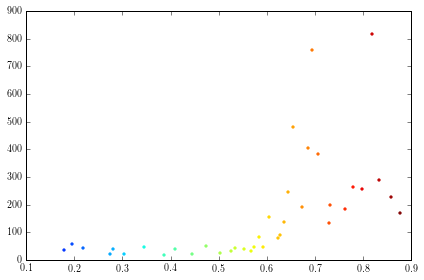

In [173]:
for n in ns_all:
    #tau_v = corr.decay_scale(Psi_ac_vg[n], tf, smooth='', method='inverse_mean', rectify=False)
    #tau_m = corr.decay_scale(np.maximum(Psi_ac_vg[n],0), tf, smooth='', method='mean', rectify=False)
    tau_i = corr.decay_scale(Psi_ac_vg[n], tf, smooth='', method='int', rectify=False)
    dens = density[margin][n]
    plt.scatter(dens, tau_i, marker='.', color=col(dens))
    #plt.scatter(dens, tau_m, marker='*', color=col(dens))
    #plt.scatter(dens, tau_v, marker='+', color=col(dens))    
plt.xlim(.1,.9)
plt.ylim(0, None)

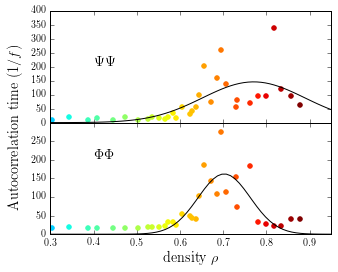

In [52]:
save = True
rc('text', usetex=True)
ns = ns_all
figsize = (smallfig[0]*1.5, smallfig[1])
fig = plt.figure(figsize=smallfig)
gs = gridspec.GridSpec(2,1)
gs.update(hspace=0, left=.12)
axt = fig.add_subplot(gs[0])
axb = fig.add_subplot(gs[1])
axphi = axb
axpsi = axt

Phi_time = np.array([corr.decay_scale(Phi_ac[n], smooth='', method='int') for n in ns]) * freq/fps
Psi_time = np.array([corr.decay_scale(Psi_ac_vg[n], smooth='', method='int') for n in ns]) * freq/fps
for n, tau in zip(ns, Phi_time):
    axphi.scatter(density[margin][n], tau, color=col(density[margin][n]))
for n, tau in zip(ns, Psi_time):
    axpsi.scatter(density[margin][n], tau, color=col(density[margin][n]))
#axphi.plot(densities[margin], Phi_time, 'k--', alpha=0.5)
#axpsi.plot(densities[margin], Psi_time, 'k--', alpha=0.5)
n_cont = np.linspace(0,1,100)
axphi.plot(n_cont, gauss(n_cont, *p_phi), 'k')
axpsi.plot(n_cont, gauss(n_cont, *p_psi), 'k')

axt.set_ylim(0, None)
axphi.text(0.4, 200, r'$\Phi\Phi$', fontsize='x-large')
axpsi.text(0.4, 200, r'$\Psi\Psi$', fontsize='x-large')
axt.set_xticklabels([])
axb.set_xlabel(r'density $\rho$', fontsize='x-large')  
xlim = (.3, .95)
axt.set_xlim(xlim)
axb.set_xlim(xlim)
axb.set_ylim(0, None)
axb.set_yticklabels(range(0,300,50))
fig.text(0, .75, "Autocorrelation time ($1/f$)", rotation='vertical', fontsize='x-large')
if save: plt.savefig(savedir+'autocorr_time.pdf')